# Lego evolution analysis
Project 2023_01

## Intro

This project is based on the one proposed on DataCamp "Exploring the Evolution of Lego".
The following solution is original and two versions of the results are proposed. A first one with python code and one with SQL code (Panda SQL).

Instructions: 
https://www.youtube.com/watch?v=BzQDi4D0B_M&t=2319s

Data source:
https://rebrickable.com/downloads/

The purpose of this project is to get familiar with Python and be able to answer analitical questions

## 1 - Libraries

In [41]:
import pandas as pd

#SQL query with panda
!conda install --yes pandasql
from pandasql import sqldf

!conda install numpy
import numpy as np
!conda install matplotlib

import matplotlib
import matplotlib.pyplot as plt



Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




Solving environment: ...working... done

# All requested packages already installed.



### 2 - Import datasets

#### 2.1 - List of lego sets

In [36]:
#import directly from github repository
df = pd.read_csv('https://raw.githubusercontent.com/jaguara01/20230608_Python_Lego_Project/main/20230608_lego_sets.csv')

df.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


#### 2.2 - List of lego themes

In [60]:
#import directly from github repository
df_theme = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/parent_themes.csv')
df_theme = df_theme.rename(columns={'name': 'theme_name'})
df_theme.head(50)

,id,theme_name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
5,147,Pirates,False
6,155,Modular Buildings,False
7,158,Star Wars,True
8,186,Castle,False
9,204,Designer Sets,False


### 3 - Task 1 - Proportion of sets by themes

#### 3.1 - Python solution

In [49]:
#Merge sets information and theme information
df_merge = df.merge(df_theme, how='inner',left_on='theme_id', right_on='id')

df_merge.head()

,set_num,name,year,theme_id,num_parts,img_url,id,theme_name,is_licensed
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,1,Technic,False
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,1,Technic,False
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,https://cdn.rebrickable.com/media/sets/1030-1.jpg,1,Technic,False
3,1038-1,ERBIE the Robo-Car,1985,1,120,https://cdn.rebrickable.com/media/sets/1038-1.jpg,1,Technic,False
4,1039-1,Manual Control Set 1,1986,1,39,https://cdn.rebrickable.com/media/sets/1039-1.jpg,1,Technic,False


In [50]:
#Keep only licensed themes
licensed = df_merge[df_merge['is_licensed']==True]
licensed.head()

,set_num,name,year,theme_id,num_parts,img_url,id,theme_name,is_licensed
2206,10132-1,Motorized Hogwarts Express,2004,246,713,https://cdn.rebrickable.com/media/sets/10132-1...,246,Harry Potter,True
2207,10217-1,Diagon Alley,2011,246,2032,https://cdn.rebrickable.com/media/sets/10217-1...,246,Harry Potter,True
2208,30110-1,Trolley,2011,246,22,https://cdn.rebrickable.com/media/sets/30110-1...,246,Harry Potter,True
2209,30111-1,The Lab,2011,246,34,https://cdn.rebrickable.com/media/sets/30111-1...,246,Harry Potter,True
2210,30392-1,Hermione's Study Desk,2021,246,30,https://cdn.rebrickable.com/media/sets/30392-1...,246,Harry Potter,True


In [51]:
#Count of the number of sets by theme
df_agg = licensed.groupby(['theme_name'])['set_num'].agg('count').reset_index()

#We add a new column with the total number of sets
df_agg['total']    = licensed.shape[0]

#Calculation of the representation of each theme on the total number of sets (%)
df_agg['prop_pct'] = df_agg.set_num/df_agg.total*100

df_agg = df_agg.sort_values(by='set_num', ascending=False)
df_agg.head()

,theme_name,set_num,total,prop_pct
16,Star Wars,876,1514,57.859974
8,Harry Potter,147,1514,9.709379
11,Minecraft,113,1514,7.463672
5,Disney Princess,87,1514,5.746367
10,Jurassic World,84,1514,5.548217


##### creating bar plot


Text(0, 0.5, 'Number of sets')

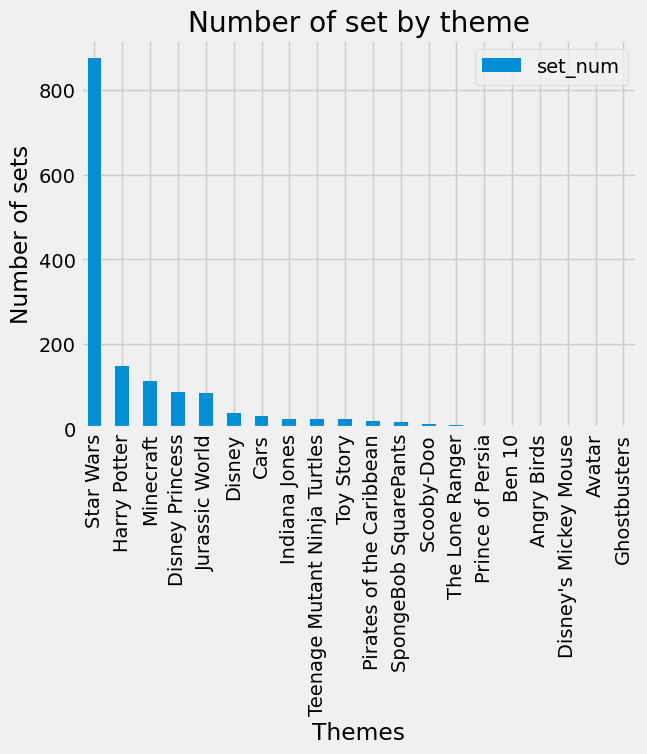

In [52]:
matplotlib.style.use('fivethirtyeight')
df_agg.plot(x='theme_name',y='set_num',kind="bar")
plt.title("Number of set by theme")
plt.xlabel("Themes")
plt.ylabel("Number of sets")

#### 3.2 - SQL solution

In [55]:
query = """ SELECT theme_id,
            b.theme_name,
            count(theme_name) as set_cnt,
            sum(count(theme_name)) over() as total_set_cnt,
            100*count(theme_name)/(sum(count(theme_name)) over()) as theme_set_pct
            FROM df 
            inner join df_theme B
            on df.theme_id = B.id
            and B.is_licensed = 1
            group by theme_id,
                    b.theme_name
        """


df_prop = sqldf(query)
df_prop

,theme_id,theme_name,set_cnt,total_set_cnt,theme_set_pct
0,158,Star Wars,876,1514,57
1,246,Harry Potter,147,1514,9
2,263,Pirates of the Caribbean,17,1514,1
3,264,Indiana Jones,23,1514,1
4,269,Cars,28,1514,1
5,270,Ben 10,6,1514,0
6,271,Prince of Persia,6,1514,0
7,272,SpongeBob SquarePants,14,1514,0
8,275,Toy Story,21,1514,1
9,317,Avatar,2,1514,0


### 4 - Task 2 - Find the most popular theme each year

#### 4.1 - Python solution

In [59]:
df_agg = licensed.groupby(['theme_name','year'])['set_num'].agg('count').reset_index()

df_agg = df_agg.sort_values(by=['year','set_num'], ascending=False)

df_agg_year = df_agg.groupby(['year']).first().reset_index()
df_agg_year.head()

,year,theme_name,set_num
0,1999,Star Wars,13
1,2000,Star Wars,21
2,2001,Harry Potter,11
3,2002,Star Wars,22
4,2003,Star Wars,25
5,2004,Star Wars,22
6,2005,Star Wars,26
7,2006,Star Wars,11
8,2007,Star Wars,15
9,2008,Star Wars,22


#### 4.2 - SQL solution

In [57]:
# SQL Version
query = """ WITH cte AS (
            SELECT year, theme_name, set_num,
            RANK() OVER ( PARTITION BY year
            ORDER BY set_num DESC
            ) AS r
    FROM df_agg
)
SELECT year, theme_name, set_num
FROM cte
WHERE r = 1
ORDER BY year ASC
        """


df_pop = sqldf(query)

df_pop



,year,theme_name,set_num
0,1999,Star Wars,13
1,2000,Star Wars,21
2,2001,Harry Potter,11
3,2002,Star Wars,22
4,2003,Star Wars,25
5,2004,Star Wars,22
6,2005,Star Wars,26
7,2006,Star Wars,11
8,2007,Star Wars,15
9,2008,Star Wars,22


### 5 - Task 3 - How many uniques sets were released each year?

#### 5.1 - Python solution

In [61]:
df_unique_cnt = df.groupby(['year']).name.nunique()
df_unique_cnt

year
1949       5
1950       6
1953       4
1954      13
1955      38
        ... 
2019     995
2020     994
2021    1107
2022     974
2023     643
Name: name, Length: 73, dtype: int64

#### 5.2 - SQL solution

In [62]:
# SQL Version
query = """ 
            SELECT year, count(distinct name)
    FROM df
    group by year
        """
df_year_cnt = sqldf(query)

df_year_cnt


,year,count(distinct name)
0,1949,5
1,1950,6
2,1953,4
3,1954,13
4,1955,38
...,...,...
68,2019,995
69,2020,994
70,2021,1107
71,2022,974
